In [1]:
# Airbnb London data
# http://insideairbnb.com/get-the-data.html

# Elimizdeki veri Airbnb sitesindeki evlere ait verilerin site uzerinden scraping ile alinmasi sor

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns

baslik_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size': 13}
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
listings = pd.read_csv('listings.csv')

In [4]:
# Elimizde 74 sutun ve 77136 satirdan olusan bir veri setimiz var.

print(listings.shape)

(77136, 74)


In [5]:
# Dataframe in ilk uc satirina bakarak veriye dair daha iyi bilgi ediniyoruz Bu arada isimize yaramayacagini
# dusundugumuz sutunlari da belirliyoruz.

listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201216161425,2021-01-04,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Lambeth,NaN,51.46225,-0.11732,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Kitchen"", ""Crib"", ""Dedicated...",$105.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,33,63,338,2021-01-04,192,6,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,t,2,2,0,0,1.46
1,13913,https://www.airbnb.com/rooms/13913,20201216161425,2020-12-18,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,75%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Long term stays allowed"", ""Lock on bedroom d...",$40.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,30,60,90,365,2020-12-18,21,1,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201216161425,2020-12-28,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Wifi"", ""Heating"", ""Dishes an...",$75.00,10,50,10.0,10.0,50.0,50.0,10.0,50.0,

In [6]:
# Istemedigimiz sutunlari cikarip yeni bir dataframe olusturuyoruz.

new = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
                        'neighborhood_overview', 'picture_url', 'host_id', 'host_url','host_name',
                        'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                        'host_total_listings_count', 'host_verifications','neighbourhood',
                        'neighbourhood_group_cleansed', 'property_type',  'bathrooms','bathrooms_text',
                        'amenities', 'minimum_minimum_nights','maximum_minimum_nights',
                        'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm',
                        'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                        'availability_30', 'availability_60', 'availability_90','availability_365',
                        'calendar_last_scraped','number_of_reviews_ltm', 'number_of_reviews_l30d',
                        'first_review','last_review','license','calculated_host_listings_count',
                        'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                        'calculated_host_listings_count_shared_rooms','reviews_per_month','host_neighbourhood',
                     'latitude','longitude','host_listings_count'], axis =1)

In [7]:
# Olusturdugumuz new isimli yeni dataframeimizdeki sutunlarimizda kayip veri olup olmadigini, var ise oranini hesapliyoruz.

new.isnull().sum()/new.shape[0]*100

id                              0.000000
host_since                      0.053153
host_response_time             51.791641
host_response_rate             51.791641
host_acceptance_rate           40.388405
host_is_superhost               0.053153
host_has_profile_pic            0.053153
host_identity_verified          0.053153
neighbourhood_cleansed          0.000000
room_type                       0.000000
accommodates                    0.000000
bedrooms                        6.290189
beds                            1.483095
price                           0.000000
minimum_nights                  0.000000
maximum_nights                  0.000000
number_of_reviews               0.000000
review_scores_rating           31.335563
review_scores_accuracy         31.417237
review_scores_cleanliness      31.405569
review_scores_checkin          31.478168
review_scores_communication    31.414644
review_scores_location         31.476872
review_scores_value            31.478168
instant_bookable

In [8]:
# Hem cok isimize yarayacagini dusunmedigimden hem de %40 uzerinde kayip verisi oldugu icin asagideki
# uc sutunu da veri setimizden cikarabiliriz.

new = new.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis =1)

In [9]:
# Diger kayip verisi olan sutunlar icin (ozellikle) review ile ilgili bolumleri her hangi bir yontem ile
# doldurup yanlis bir tahminde bulunmak istemedigim icin bu satirlari da veri setimizden cikariyorum. 

new = new.dropna()

In [10]:
# Elimde su an 22 sutun ve 49515 satirlik bir veri setim var.

print(new.shape)

(49515, 22)


In [11]:
# Ozellikle categorical veriler icin secenek sayisini gorebilmek adina nunique() fonksiyonu ile unique degerlere bakalim

new.nunique()

id                             49515
host_since                      3683
host_is_superhost                  2
host_has_profile_pic               2
host_identity_verified             2
neighbourhood_cleansed            33
room_type                          4
accommodates                      16
bedrooms                          14
beds                              23
price                            728
minimum_nights                    92
maximum_nights                   276
number_of_reviews                400
review_scores_rating              53
review_scores_accuracy             9
review_scores_cleanliness          9
review_scores_checkin              9
review_scores_communication        9
review_scores_location             9
review_scores_value                9
instant_bookable                   2
dtype: int64

In [12]:
# Ev sahiplerinin toplam kac gun Airbnb'de bulunduklarini hesaplayalim. 
# Toplam gun sayisinin number of reviews uzerinde etkisi olabilir. Yeni evler genelde daha az review aliyorlar.

new['host_since'] = pd.to_datetime(new['host_since'], format='%Y/%m/%d')
end_date=pd.to_datetime('now')
new['host_days'] = (end_date - new['host_since']).dt.days

In [13]:
# Artik bu sutuna ihtiyacimiz yok

new = new.drop(['host_since'], axis=1)

In [14]:
# Price sutunundaki tum veriler $ uzerinden. $ isaretini kaldirip sutundaki degerleri float yapalim

new['price'] = new['price'].apply(lambda x: x.replace('$','').replace(',','')
                                  if isinstance (x,str) else x).astype(float)

In [15]:
# Neighbourhood_cleansed sutunundaki bolge isimlerini Londra'daki zonelara (1-6) gore kategorik hale getirelim.

# nunique() fonksiyonu sonuclarinda da gorebilecegimiz gibi elimizdeki veride 33 farkli bolge belirtilmis.
# Bu 33 bolgenin hangi zone'a ait oldugunu manuel olarak hizlica bir excel dosyasinda hazirladim. 

# Zone sutununda sadece 1'den 6'ya kadar olan sayilar mevcut. Zone 1 Londra merkezi temsil ediyor ve zone sayisi
# yukseldikce merkez disina dogru cikiliyor.

# not: bazi bolgeler cok buyuk olduklari icin birden fazla zone a dagilmis durumda. 
# Bu sartlarda olan bolgeler icin merkeze en yakin zone secildi. 

zones = pd.read_excel('neighbourhoods.xlsx')
new = pd.merge(new, zones)

In [16]:
# artik bu sutuna ihtiyacimiz yok

new = new.drop(['neighbourhood_cleansed'], axis=1)

In [17]:
new.head(3)

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,zone
0,11551,f,t,t,Entire home/apt,4,1.0,3.0,105.0,2,1125,192,91.0,9.0,9.0,10.0,10.0,9.0,9.0,t,4153,1
1,72913,t,t,t,Private room,2,1.0,1.0,48.0,2,10,157,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3662,1
2,73431,t,t,t,Entire home/apt,6,2.0,3.0,73.0,3,30,65,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,3659,1


In [19]:
new.describe()

,id,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_days,zone
count,4.951500e+04,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000,4.951500e+04,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000,49515.000000
mean,2.346740e+07,3.173665,1.479612,1.744623,113.471949,4.660366,3.166493e+04,22.323437,93.293467,9.544057,9.297667,9.659315,9.682218,9.559972,9.322347,1954.831627,1.632273
std,1.258385e+07,1.950780,0.837919,1.268414,393.543175,21.389960,5.075517e+06,40.927372,10.167140,1.004098,1.167044,0.905589,0.899555,0.854654,1.051277,830.767302,0.931690
min,1.155100e+04,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,72.000000,1.000000
25%,1.375281e+07,2.000000,1.000000,1.000000,43.000000,1.000000,3.100000e+01,3.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1352.000000,1.000000
50%,2.326128e+07,2.000000,1.000000,1.000000,75.000000,2.000000,1.125000e+03,8.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1999.000000,1.000000
75%,3.430121e+07,4.000000,2.000000,2.000000,125.000000,3.000000,1.125000e+03,24.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2524.000000,2.000000
max,4.702667e+07,16.000000,22.000000,28.000000,18175.000000,1124.000000,1.000000e+09,817.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4568.000000,6.000000


In [23]:
# new[new['price'] == 0].count()['price']

In [24]:
# Beds ve price degeri 0 olan satirlar bulunuyor. Onlari veri setinden cikariyorum cunku ileriki adimda log donusumu uygulayacagim.

new = new.drop(new[new['price'] == 0].index)
new = new.drop(new[new['beds'] == 0].index)

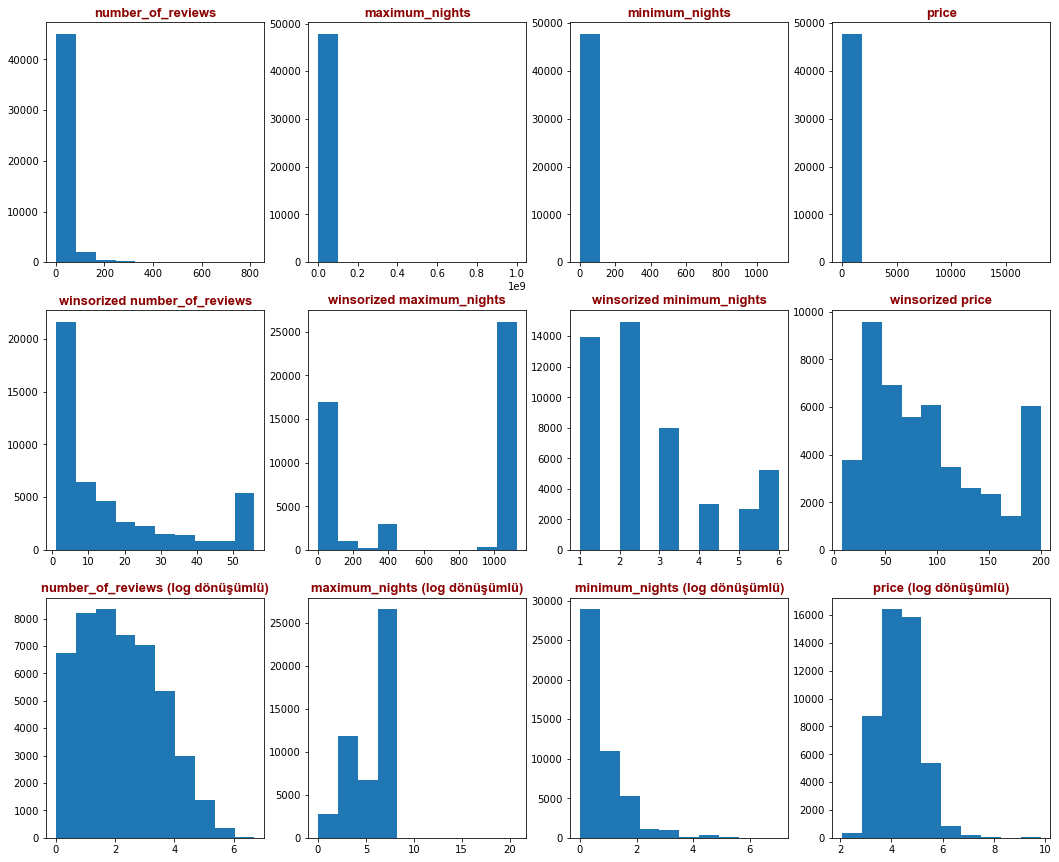

In [26]:
# Yukaridaki describe() fonksiyonu ile baktigimizda bazi sutunlarda yuksek degerler gormustuk.
# Bazi sutunlardaki degerler icin hem aykiri deger var mi diye hem de dagilimlarini gorebilmek amaciyla 
# winsorize edilmis ve log donusumlu versiyonlari icin histogramlarini cizelim.

plt.figure(figsize=(18,15))

fields = ['number_of_reviews', 'maximum_nights' , 'minimum_nights', 'price']

for i in range(4):
    plt.subplot(3, 4, i+1)
    plt.hist(new[fields[i]])
    plt.title(fields[i], fontdict=baslik_font)
    
for i in range(4):
    plt.subplot(3, 4, i+5)
    plt.hist(winsorize(new[fields[i]],(0,0.10)))
    plt.title('winsorized ' + fields[i], fontdict=baslik_font)
    
for i in range(4):
    plt.subplot(3, 4, i+9)
    plt.hist(np.log(new[fields[i]]))
    plt.title(fields[i] + ' (log dönüşümlü)', fontdict=baslik_font)

In [40]:
# Yukaridaki grafiklere baktigimizda log donusumlu degiskenler normal dagilima daha yakin bir sekilde dagildilar.
# Yine de emin olmak icin asagidaki testlerin sonuclarina bakalim

from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["number_of_reviews", "maximum_nights", "minimum_nights","price"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(new[ozellik]))
    norm_stats = normaltest(np.log(new[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

# p degerleri 0 verdigi icin log donusumlerinin halen daha normal dagilmadigini anliyoruz.

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,number_of_reviews,1487.48335,0.00000,3527.79914,0.00000
1,maximum_nights,5943.53100,0.00000,9205.88440,0.00000
2,minimum_nights,71146.08122,0.00000,16622.22867,0.00000
3,price,5495.86140,0.00000,3226.49258,0.00000


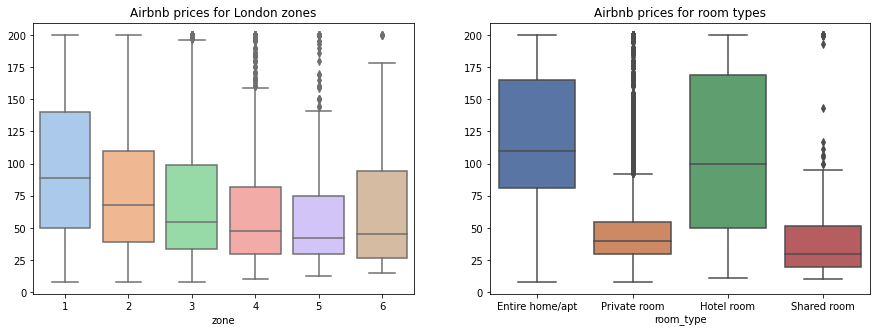

In [28]:
# Zone ve oda tipine gore fiyatlarin nasil degistigine seaborn kutuphanesini kullanarak bakalim. Fiyatlardaki 
# aykiri degerler büyük değerlerde olduğu için tek yönlü olarak winsorize edebilmis fiyatlari kullandim.

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'zone',  y = winsorize(new['price'],(0,0.10)), data = new, palette = 'pastel')
plt.title("Airbnb prices for London zones")

plt.subplot(1,2,2)
sns.boxplot(x = 'room_type',  y = winsorize(new['price'],(0,0.10)), data = new, palette = 'deep')
plt.title("Airbnb prices for room types")

plt.show()

# Asagidaki sonuclar bekledigim gibi cikti. Londra'nin en pahali bolgesi Zone 1 ve Zone arttikca merkezden
# uzaklasildigi icin fiyatlarin dusmesi normal. 
# Benzer sekilde tum bir evin veya otel odasinin ozel/paylasimli odadan daha yuksek fiyata sahip olmasi da normal.

In [29]:
# Elimizde 4 farkli sutunda t/f olarak categorical bilgiler bulunmakta. Bunlari 1/0 olarak degistirdim.

categorical = {'host_is_superhost':{'t': 1, 'f': 0},
               'host_has_profile_pic': {'t': 1, 'f': 0},
              'host_identity_verified': {'t': 1, 'f': 0},
              'instant_bookable': {'t': 1, 'f': 0}}

new = new.replace(categorical)

In [30]:
# Elimde kalan son categorical sutun (room_type) 4 farkli secenege sahil oldugundan burada get_dummies metodunu
# uygulamayi daha uygun buldum. Son olarak room_type sutununu veri setimden cikardim.

new = pd.concat([new, pd.get_dummies(new['room_type'])], axis = 1)
new = new.drop(['room_type'], axis =1)

In [33]:
# Elimizdeki veriden son olarak 'id' sutununu da cikarip kalan degiskenlerin korelasyonuna bakalim.

new = new.drop(['id'], axis =1)
new.corr()

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days,zone,Entire home/apt,Hotel room,Private room,Shared room
host_is_superhost,1.000000,0.015067,0.078167,-0.038888,-0.041612,-0.026246,-0.014917,0.003186,-0.002264,0.273094,0.190898,0.169922,0.197071,0.140954,0.143339,0.127240,0.176836,-0.007146,0.062237,0.032284,-0.083921,-0.025870,0.090862,-0.015611
host_has_profile_pic,0.015067,1.000000,0.046186,0.013236,0.009347,0.003457,0.003947,0.000063,0.000224,0.014032,0.020985,0.021222,0.025241,0.025945,0.017692,0.019272,0.017719,-0.009182,0.037791,-0.016316,0.016246,-0.006394,-0.014008,-0.008418
host_identity_verified,0.078167,0.046186,1.000000,0.109219,0.059197,0.073821,0.039514,0.021100,0.002142,0.098076,0.028684,0.031569,0.041633,0.029320,0.026232,0.060937,0.013548,-0.000015,0.152559,-0.116273,0.119520,0.015469,-0.120968,-0.010983
accommodates,-0.038888,0.013236,0.109219,1.000000,0.811174,0.835464,0.165770,0.004337,-0.000500,-0.057085,-0.043887,-0.052296,-0.029843,-0.043014,-0.053375,-0.010600,-0.086572,0.002605,0.011100,-0.049359,0.562902,-0.013886,-0.559814,-0.020180
bedrooms,-0.041612,0.009347,0.059197,0.811174,1.000000,0.790000,0.147042,0.011742,-0.002687,-0.085333,0.004305,-0.016143,0.001801,-0.016150,-0.021770,-0.007128,-0.037917,-0.038505,0.026753,0.010782,0.443985,-0.023032,-0.435675,-0.042240
beds,-0.026246,0.003457,0.073821,0.835464,0.790000,1.000000,0.141059,0.006192,-0.002977,-0.046981,-0.036172,-0.048186,-0.024657,-0.031414,-0.042886,-0.022378,-0.066237,0.007781,-0.004072,0.015355,0.415400,0.006463,-0.423696,0.038273
price,-0.014917,0.003947,0.039514,0.165770,0.147042,0.141059,1.000000,0.035363,-0.000937,-0.021680,-0.006845,-0.006227,0.011004,-0.012002,-0.017292,0.019165,-0.027768,0.035230,-0.007402,-0.052673,0.132934,0.004227,-0.132669,-0.010178
minimum_nights,0.003186,0.000063,0.021100,0.004337,0.011742,0.006192,0.035363,1.000000,-0.000566,-0.012731,0.003955,-0.002718,-0.002402,0.003385,0.001936,-0.003493,-0.002047,-0.026236,0.031463,-0.016205,0.033549,-0.010351,-0.030526,-0.009710
maximum_nights,-0.002264,0.000224,0.002142,-0.000500,-0.002687,-0.002977,-0.000937,-0.000566,1.000000,-0.000831,0.002590,0.002090,0.002696,0.001736,0.001626,0.002270,0.002971,-0.003121,0.005715,-0.003070,-0.005332,-0.000379,0.005466,-0.000336
number_of_reviews,0.273094,0.014032,0.098076,-0.057085,-0.085333,-0.046981,-0.021680,-0.012731,-0.000831,1.000000,0.060031,0.093677,0.088071,0.088020,0.086520,0.068530,0.083206,0.015299,0.151688,-0.033140,-0.138835,-0.006029,0.139111,0.008706


Text(0.5, 1.0, 'Airbnb korelasyon matrisi')

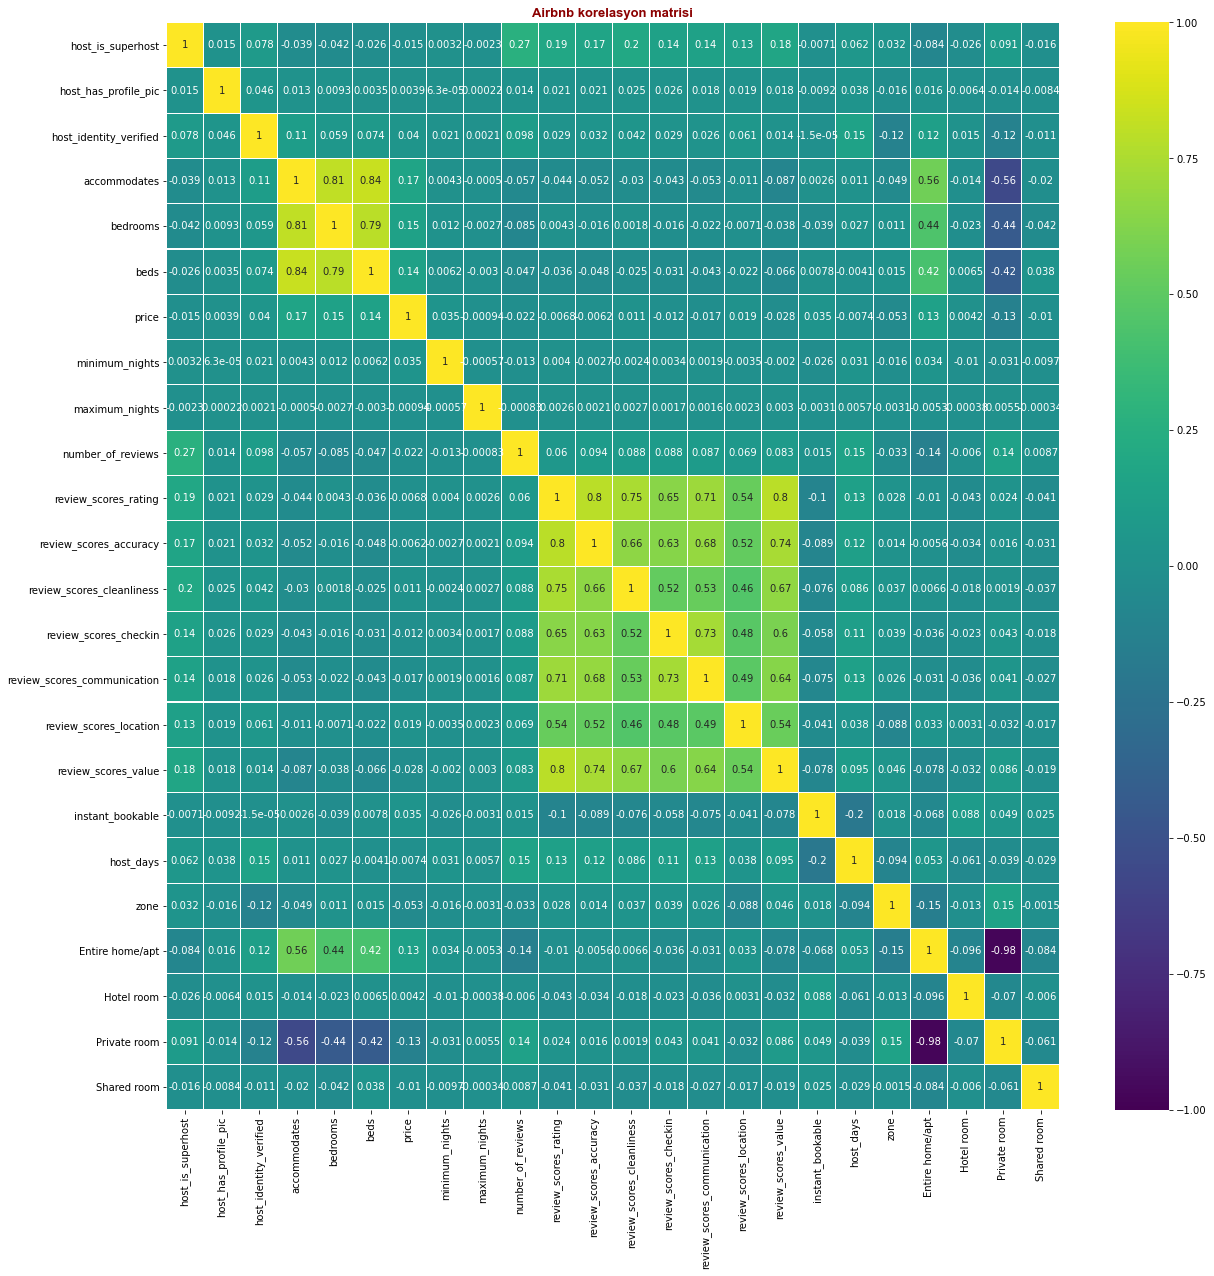

In [34]:
# Cok fazla degisken oldugu icin gorsel olarak bakmak daha kolay olacak

plt.figure(figsize=(20,20))
sns.heatmap(new.corr(), annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Airbnb korelasyon matrisi", fontdict = baslik_font)

In [2]:
# Korelasyon matrixine gore gozlemlerim:
# 1. review_scores_rating tahminimce 6 farkli reviewin (accuracy, cleanliness, checkin, communication, location,
#    value) ortalamasi olabilir. Ya da kalan kisinin son olarak verdigi genel bir not olabilir. Bu sebeple bu 7 
#    farkli review degiskeninin birbiriyle cok korrele olmasi beklenen bir sonuc. Ileriki asamalarda bunlardan
#    sadece bir tanesi tutulup analize devam edilebilir.

# 2. Entire home/apt ile kalacak kisi, yatak odasi ve yatak sayilari arasinda pozitif bir iliski var. Bu da
#    beklenen bir sonuc cunku tek bir odaya gore daha buyuk bir alani kiraya veriyorsunuz. Bunun tam tersini de
#    zaten private room ile olan negatif iliskide gorebiliriz.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

X = StandardScaler().fit_transform(new)
pca = PCA(n_components=24)
principalComponents=pca.fit_transform(new)


In [54]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[9.99999960e-01 3.28837431e-08 7.33117814e-09 7.72755034e-11
 2.21510804e-11 5.00358928e-12 2.63396566e-13 4.31670659e-14
 4.16201708e-14 2.84268310e-14 2.01443985e-14 1.94120487e-14
 1.63362150e-14 1.34194659e-14 1.20001410e-14 1.03012137e-14
 1.01408717e-14 8.58448149e-15 7.14902538e-15 6.32328265e-15
 5.65446842e-16 2.75958022e-16 1.12247821e-16 2.81872362e-45]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [55]:
# Son olarak PCA uyguladim yeni olusturacagim degiskenin varyansin 100% unu acikladigi sonucu cikti.
# Burada acaba bazi degiskenleri cikarip mi PCA uygulamaliydim emin olamadim. 
# Aslinda bu veri setinin analizinde belirledigin hedef degiskenim price degeriydi. Onu cikarip PCA uyguladigimda
# yine ayni sonucu aliyorum.